# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

## Get data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-27 13:21:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 173.194.192.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   229MB/s    in 0.5s    

2022-07-27 13:21:48 (229 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
#Walk through pizza_steak directory and list number of files
   

## To visualize our images, first let's get the class names programmatically

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*"))) # Created a list of class_names from the subdirectory   
class_names

array(['pizza', 'steak'], dtype='<U5')

In [1]:
#Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (We'll view images from here)
  target_forder = target_dir   + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_forder),1);

  #Read in the image and plot in using matplotlib
  img = mpimg.imread(target_forder+"/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


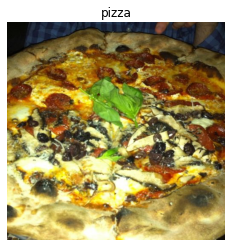

In [ ]:
#View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  7,   8,   3],
        [  8,   9,   4],
        [  9,  10,   5],
        ...,
        [ 15,  16,  18],
        [ 14,  16,  15],
        [ 16,  18,  15]],

       [[  7,   8,   3],
        [  8,   9,   4],
        [  9,  10,   5],
        ...,
        [ 14,  15,  17],
        [ 14,  16,  15],
        [ 15,  17,  14]],

       [[  8,   9,   4],
        [  8,   9,   4],
        [  8,   9,   4],
        ...,
        [ 13,  14,  16],
        [ 13,  15,  14],
        [ 15,  17,  16]],

       ...,

       [[127, 121,  99],
        [117, 111,  89],
        [ 75,  68,  49],
        ...,
        [ 17,  13,   4],
        [ 17,  13,   2],
        [ 19,  13,   1]],

       [[118, 114,  89],
        [ 98,  94,  69],
        [ 54,  49,  27],
        ...,
        [ 17,  13,   4],
        [ 19,  12,   2],
        [ 19,  12,   2]],

       [[109, 108,  80],
        [ 85,  83,  58],
        [ 41,  39,  16],
        ...,
        [ 18,  13,   

In [ ]:
#View the image shape
img.shape  # return the width, height, color channels

(512, 512, 3)

## An end-to-end example
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#set the seed
tf.random.set_seed(42)

#Preprocess data(get all of the pixel values between 0 and 1,also called scaling/normalization )
train_datagen = ImageDataGenerator(rescale= 1./255, )
valid_datagen = ImageDataGenerator(rescale= 1./255, )


#Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed =42
                                              )
valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed =42
                                               )

#Building a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

#Compile our CNN
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

#Fit the model
model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
            validation_data= valid_data,
            validation_steps =len(valid_data) )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 228ms/step - loss: 0.6120 - accuracy: 0.6733 - val_loss: 0.4844 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 13s 269ms/step - loss: 0.4252 - accuracy: 0.8013 - val_loss: 0.3621 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3904 - accuracy: 0.8293 - val_loss: 0.3301 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3587 - accuracy: 0.8480 - val_loss: 0.3168 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3338 - accuracy: 0.8633 - val_loss: 0.3133 - val_accuracy: 0.8920


## Using the same model as before

In [ ]:
#Set random seed
tf.random.set_seed(42)


#Building a CNN model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

#Compile our CNN
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

#Fit the model
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
            validation_data= valid_data,
            validation_steps =len(valid_data) )

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 1.5938 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
#Set random seed
tf.random.set_seed(42)


#Building a CNN model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

#Compile our CNN
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

#Fit the model
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
            validation_data= valid_data,
            validation_steps =len(valid_data) )

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 2.6699 - accuracy: 0.6720 - val_loss: 0.4660 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6776 - accuracy: 0.7060 - val_loss: 0.4611 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.7706 - accuracy: 0.6940 - val_loss: 0.4805 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6957 - accuracy: 0.7347 - val_loss: 0.4562 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6658 - accuracy: 0.7380 - val_loss: 0.6568 - val_accuracy: 0.6960


# Binary Classifiaction: Let's break it down
1. Become one with data (visualize)
2. Preprocess the data (prepared it for our model, (scaling or normalizing))
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

## 1. Become one with the data

Image shape: (384, 512, 3)
Image shape: (384, 512, 3)


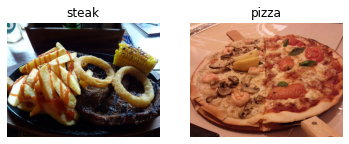

In [ ]:
#Visualize data 
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/", "steak");
plt.subplot(1,2,2)
steak_image = view_random_image("pizza_steak/train/", "pizza");

## 2. Preprocess the data (prepare it for a model"

In [ ]:

#Define directory dataset paths
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"


### Our next step to turn our data into batches

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255, )
test_datagen = ImageDataGenerator(rescale= 1./255, )

In [ ]:
#Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed =42
                                              )
test_data = test_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed =42
                                               )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

## 3. Create a CNN model

In [ ]:
#Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Create a model
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3,strides= 1, padding='valid', activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid"),
])

In [ ]:
# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = Adam(),
                metrics=['accuracy'])

## 4. Fit the model

In [ ]:
#Fit the model 
history_4 = model_4.fit(train_data, #This is a combination of labels and images
                        epochs=5, 
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 11s 206ms/step - loss: 1.2325 - accuracy: 0.6567 - val_loss: 0.4228 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4408 - accuracy: 0.8020 - val_loss: 0.3937 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3482 - accuracy: 0.8667 - val_loss: 0.3908 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 13s 268ms/step - loss: 0.1980 - accuracy: 0.9367 - val_loss: 0.4542 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.0927 - accuracy: 0.9773 - val_loss: 0.5043 - val_accuracy: 0.7900


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 135ms/step - loss: 0.3133 - accuracy: 0.8920


[0.3132655620574951, 0.8920000195503235]

## 5. Evaluation our model

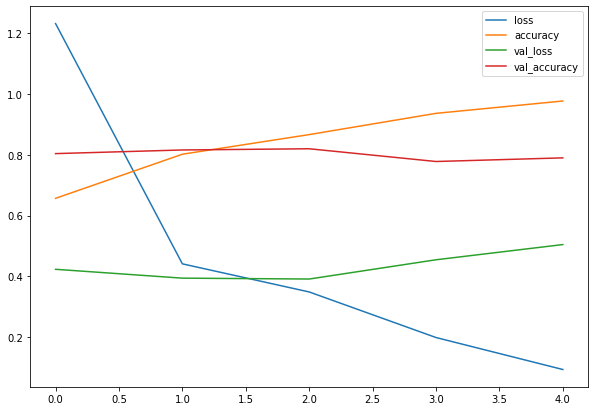

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [2]:
#Plot the validation and trainig curve separately
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))


  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

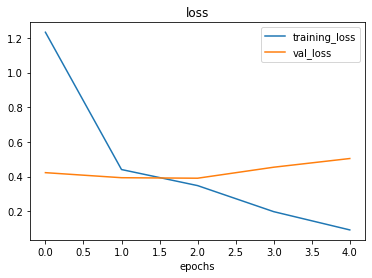

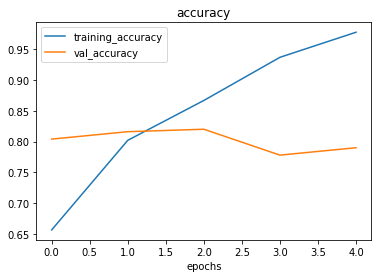

In [ ]:
#Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

In [ ]:
history_4.history

{'accuracy': [0.6566666960716248,
  0.8019999861717224,
  0.8666666746139526,
  0.9366666674613953,
  0.9773333072662354],
 'loss': [1.2324573993682861,
  0.4407893121242523,
  0.34816280007362366,
  0.19799241423606873,
  0.09266175329685211],
 'val_accuracy': [0.8040000200271606,
  0.8159999847412109,
  0.8199999928474426,
  0.777999997138977,
  0.7900000214576721],
 'val_loss': [0.42282965779304504,
  0.39366209506988525,
  0.3907736539840698,
  0.4542123079299927,
  0.5043158531188965]}

## 6. Adjust the model parameters
Fitting a machine learning model comes in 3 steps
1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to reduce overfitting:

*Increase the number of conv layers

*Increase the number of conv fitlers

*Add another dense layer to the output of our flattened layers

Reduce overfitting:
* Add data augmentation
* Add regularization layers(MaxPool2D)
* Add more data



In [ ]:
#Create the model 
#Create a model
model_5 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
      MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])


In [ ]:

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = Adam(),
                metrics=['accuracy'])


In [ ]:

#Fit the model 
history_5 = model_5.fit(train_data, #This is a combination of labels and images
                        epochs=5, 
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 10s 191ms/step - loss: 0.6102 - accuracy: 0.6680 - val_loss: 0.4720 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4753 - accuracy: 0.7833 - val_loss: 0.4177 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4342 - accuracy: 0.8133 - val_loss: 0.4011 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4362 - accuracy: 0.8047 - val_loss: 0.3564 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4108 - accuracy: 0.8307 - val_loss: 0.3871 - val_accuracy: 0.8260


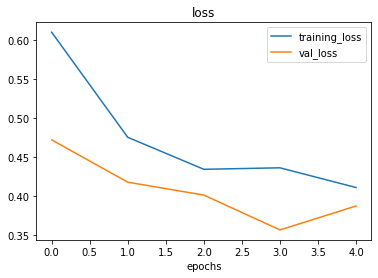

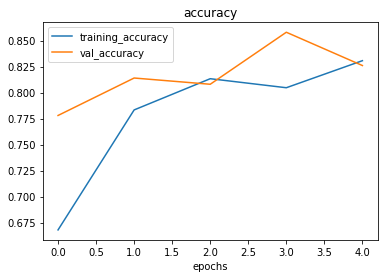

In [ ]:
#Plot loss curves 
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
#Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1.0/255,
                                              rotation_range = 0.2, #how much do you want to rotate an image?
                                              shear_range = 0.2, #how much do your want to shear an image?
                                              zoom_range = 0.2, # zoom in randomly on an image
                                              width_shift_range=0.2, # move image around on the x_axis
                                              height_shift_range=0.2, # move your image around on the y_axis
                                              horizontal_flip=True
                                              )
#Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1.0/255)

#Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [ ]:
# Import data and augment it from training directory
print("Augmented training data");
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle = False
                                             )
#Create non-augmented_train_data_batches
print("Non-augmented traning data")
train_data = train_datagen.flow_from_directory(train_dir,
                                  target_size=(224,224),
                                  batch_size=32,
                                  class_mode="binary",
                                  shuffle = False
                                  )
#Create non-augmented_test_data_batches
print("Non-augmented test data")
test_data =  test_datagen.flow_from_directory(test_dir,
                                  target_size=(224,224),
                                  batch_size=32,
                                  class_mode="binary",
                                  shuffle = False
                                  )

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented traning data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number: 17


Text(0.5, 1.0, 'Augmented image')

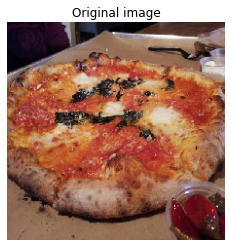

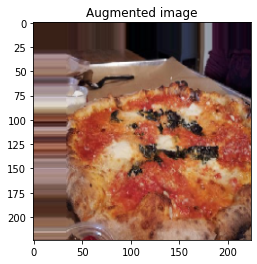

In [ ]:
#Show original image and augmented image
import random
random_number = random.randint(0,32)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")


Now we've seen what augmented training data looks like

In [ ]:
#Create a model
model_6 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
      MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])


In [ ]:

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = Adam(),
                metrics=['accuracy'])


In [ ]:

#Fit the model 
history_6 = model_6.fit(train_data_augmented, #This is a combination of labels and images
                        epochs=5, 
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 23s 471ms/step - loss: 0.7444 - accuracy: 0.5700 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 458ms/step - loss: 0.7029 - accuracy: 0.4700 - val_loss: 0.6815 - val_accuracy: 0.5680
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.6891 - accuracy: 0.5527 - val_loss: 0.6422 - val_accuracy: 0.5840
Epoch 4/5
47/47 [==============================] - 30s 641ms/step - loss: 0.6702 - accuracy: 0.6047 - val_loss: 0.6379 - val_accuracy: 0.6500
Epoch 5/5
47/47 [==============================] - 22s 458ms/step - loss: 0.5996 - accuracy: 0.6947 - val_loss: 0.7819 - val_accuracy: 0.6180


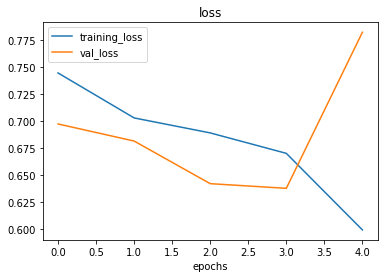

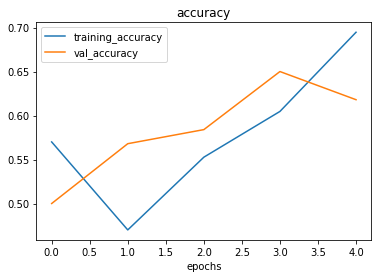

In [ ]:
#Check our model traning curves
plot_loss_curves(history_6)

### Let's shuffle our augmented tranining data and train another model on it and see what happen

In [ ]:
# Import data and augment it and shuffle from training directory
print("Augmented training data");
train_data_augmented_shffled = train_datagen_augmented.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle = True
                                             )


Augmented training data
Found 1500 images belonging to 2 classes.


In [ ]:
#Create a model
model_7 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
      MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])


# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = Adam(),
                metrics=['accuracy'])


#Fit the model 
history_7 = model_7.fit(train_data_augmented_shffled, #This is a combination of labels and images
                        epochs=5, 
                        steps_per_epoch = len(train_data_augmented_shffled),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )


Epoch 1/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6721 - accuracy: 0.5613 - val_loss: 0.5884 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 22s 464ms/step - loss: 0.5622 - accuracy: 0.7180 - val_loss: 0.5245 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 26s 553ms/step - loss: 0.5013 - accuracy: 0.7713 - val_loss: 0.3825 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 22s 462ms/step - loss: 0.4972 - accuracy: 0.7613 - val_loss: 0.4115 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4859 - accuracy: 0.7653 - val_loss: 0.3698 - val_accuracy: 0.8560


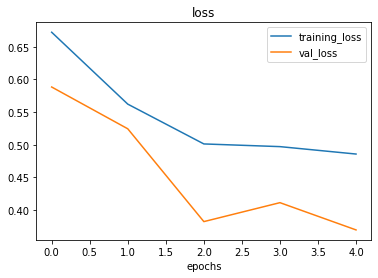

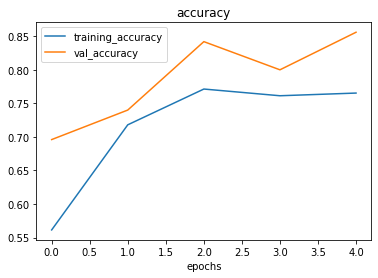

In [ ]:
plot_loss_curves(history_7)

### 7. Repeat until satisfied
Some things we could try to improve our model:
* Increase the number of layer (Conv2D, MaxPool2D)
* Increase the number of filters in each convolutional layer
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data
* User transfer learning

In [ ]:
#Create a model
model_8 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
      MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])


# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = Adam(),
                metrics=['accuracy'])


#Fit the model 
history_8 = model_8.fit(train_data_augmented_shffled, #This is a combination of labels and images
                        epochs=5, 
                        steps_per_epoch = len(train_data_augmented_shffled),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )


## Making a prediction with our trained model n our own custom data

# Multi-class Image Classification

In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip the download file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-28 02:21:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 216.58.203.240, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   203MB/s    in 2.4s    

2022-07-28 02:21:55 (203 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [4]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirpath)} directories and {len(filenames)} images  ")

There are 24 directories and 0 images  
There are 30 directories and 0 images  
There are 36 directories and 750 images  
There are 40 directories and 750 images  
There are 40 directories and 750 images  
There are 36 directories and 750 images  
There are 36 directories and 750 images  
There are 41 directories and 750 images  
There are 45 directories and 750 images  
There are 44 directories and 750 images  
There are 36 directories and 750 images  
There are 44 directories and 750 images  
There are 29 directories and 0 images  
There are 35 directories and 250 images  
There are 39 directories and 250 images  
There are 39 directories and 250 images  
There are 35 directories and 250 images  
There are 35 directories and 250 images  
There are 40 directories and 250 images  
There are 44 directories and 250 images  
There are 43 directories and 250 images  
There are 35 directories and 250 images  
There are 43 directories and 250 images  


In [5]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


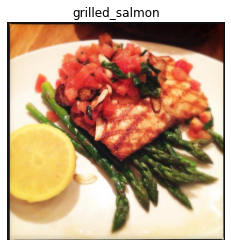

In [7]:
#Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## Preprocess the data


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size = 32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size = 32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create the model

In [9]:
#Make the creating of our model a little easier
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Create a model
model_9 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
      MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax"),
])


# Compile the model
model_9.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer = Adam(),
                metrics=['accuracy'])


#Fit the model 
history_9 = model_9.fit(train_data, #This is a combination of labels and images
                        epochs=5, 
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )


Epoch 1/5
235/235 [==============================] - 49s 195ms/step - loss: 2.1584 - accuracy: 0.1988 - val_loss: 2.0052 - val_accuracy: 0.2724
Epoch 2/5
235/235 [==============================] - 47s 201ms/step - loss: 1.9296 - accuracy: 0.3209 - val_loss: 1.8861 - val_accuracy: 0.3384
Epoch 3/5
 95/235 [===========>..................] - ETA: 19s - loss: 1.7358 - accuracy: 0.4066

In [ ]:
model_9.evaluate(test_data)

In [ ]:
plot_loss_curves(history_9)

## 6 . Adjust the model parameter to reduce overfitting
* Get more data
* Simply the model
* Use data augmentation
* Use transfer learning

In [ ]:
#Create a model
model_10 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid"),
])


# Compile the model
model_10.compile(loss=tf.keras.losses.ca,
                optimizer = Adam(),
                metrics=['accuracy'])


#Fit the model 
history_10 = model_10.fit(train_data, #This is a combination of labels and images
                        epochs=5, 
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )


In [ ]:
plot_loss_curves(history_10)

### Try to reduce overfiting with data augmentation

In [ ]:
#Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1.0/255,
                                              rotation_range = 0.2, #how much do you want to rotate an image?
                                              shear_range = 0.2, #how much do your want to shear an image?
                                              zoom_range = 0.2, # zoom in randomly on an image
                                              width_shift_range=0.2, # move image around on the x_axis
                                              height_shift_range=0.2, # move your image around on the y_axis
                                              horizontal_flip=True
                                              )
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical",
                                             shuffle = False
                                             )


In [ ]:
#Create a model
model_11 = tf.keras.models.clone_model(model_9)


# Compile the model
model_11.compile(loss=tf.keras.losses.,
                optimizer = Adam(),
                metrics=['accuracy'])


#Fit the model 
history_11 = model_11.fit(train_data_augmented, #This is a combination of labels and images
                        epochs=5, 
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )
